<a href="https://colab.research.google.com/github/catavasia/ML_FIAN-21/blob/main/seminar02_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following toy dataset:

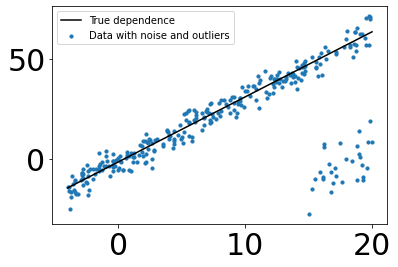

In [21]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

## Task 1

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

## Gradient Descent

In [45]:
X_expanded = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
w = np.zeros(shape=X_expanded.shape[1])

In [46]:
print("X_shape:", X_expanded.shape, ",",
      "w.shape:", w.shape, ",",
      "y.shape:", y.shape)

X_shape: (300, 2) , w.shape: (2,) , y.shape: (300,)


In [47]:
learning_rate = 0.1
loss_values = []

In [48]:
from tqdm import trange, tqdm

100%|██████████| 1000/1000 [00:00<00:00, 39517.83it/s]


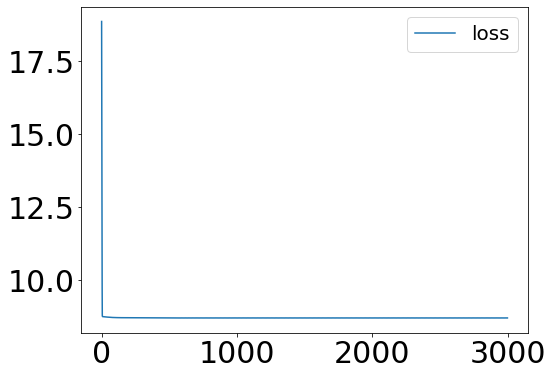

In [54]:
for _ in trange(1000):
  gradient = -np.sign(y - X_expanded @ w) @ X_expanded / len(X_expanded) 
  w -= learning_rate * gradient
  loss_values.append((np.abs(y - X_expanded @ w)).mean())

plt.figure(figsize=(8,6))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

plt.plot(loss_values, label='loss', )
plt.legend(fontsize=20)

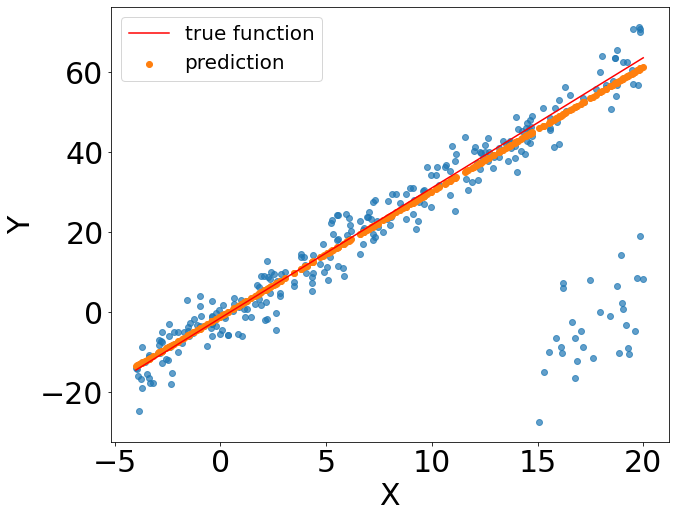

In [50]:
plt.figure(figsize=(10,8))
plt.xlabel('X', size=30)
plt.ylabel('Y', size=30)
plt.plot(x, true_function(x), c='r', label='true function')
plt.scatter(X, y, alpha=0.7)
plt.scatter(X, X_expanded @ w, label='prediction')
plt.legend(fontsize=20)

## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Comparison

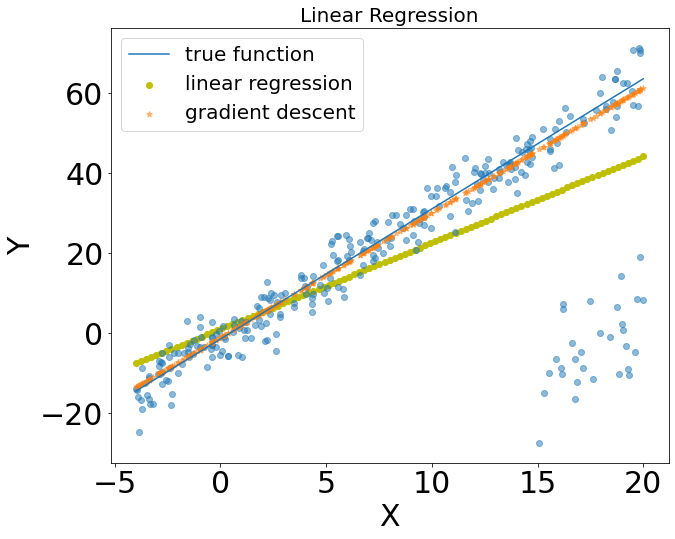

In [52]:
plt.figure(figsize=(10,8))
plt.xlabel('X', size=30)
plt.ylabel('Y', size=30)
plt.plot(x, true_function(x), label='true function')
plt.scatter(x, model.predict(x[:,None]), label='linear regression', c='y')
plt.scatter(X, y, alpha=0.5)
plt.scatter(X, X_expanded @ w, label='gradient descent', alpha=0.5, marker='*')
plt.title('Linear Regression', size=20)
plt.legend(fontsize=20)

## Наблюдение

Можно заметить, что решение, полученное с помощью градиентного спуска, близко к истинной функции. Решение, получившееся с помощью линейной регрессии, хуже описывает истинную зависимость.
Я предполагаю, что это можно объяснить так. При градиентном спуске мы оптимизировали функцию потерь, которая зависит от модуля разности. А при линейной регрессии мы берем квадраты от разностей. Из графика, где нарисована истинная зависимость и данные с шумом видно, что в сгенерированном наборе данных есть точки с большим выбросом, что негативно сказывается на решении с помощью линейной регрессии(сумма квадратов разностей больше суммы модулей разностей).
